# Robust Varibad Analysis

In [1]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cross_entropy_sampler as cem
import general_utils as utils
import analysis

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=150)
np.set_printoptions(suppress=True)

## Configuration

In [2]:
ENV_NAME = 'KhazadDum-v0'
TITLE = ENV_NAME[:-3]
ENV_SHORT = 'kd'
TASKS = ('noise',)
METHODS = ('varibad', 'cembad', 'cvrbad')
SEEDS = list(range(30))
ALPHA = 0.01

CEM-related configuration:

In [3]:
TRANSFORMATION = lambda x: x
YLIM = None
SMOOTH = 10

## CEM analysis

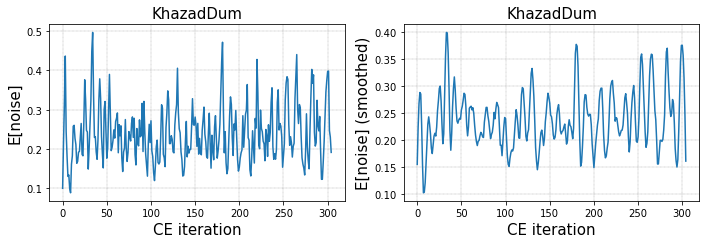

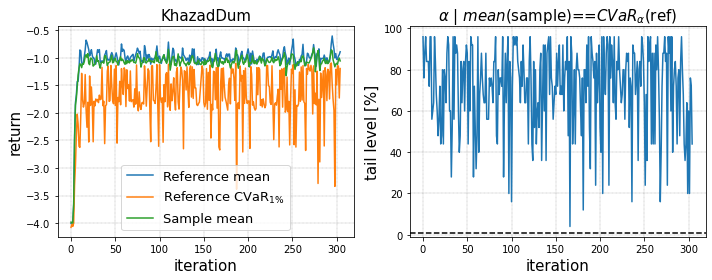

In [4]:
task_dim = len(TASKS)
ce, c1, c2, axs, axs2 = analysis.cem_analysis(
    ENV_NAME, task_dim, TRANSFORMATION, YLIM, SMOOTH, title=TITLE, tasks=TASKS, seed=1)

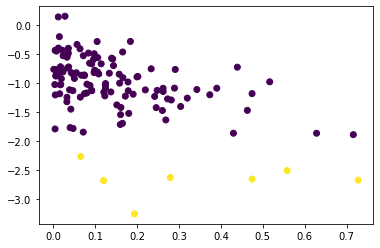

In [5]:
cc = c2[c2.batch==10]
plt.scatter(cc['sample'].values, cc.score.values, c=cc['selected'].values)

## Validation results

In [6]:
%%time
dd, dda, ddm, ddc, dd0, dda0, task_dim = analysis.load_train_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA)
dd

kd_varibad_0__24:12_01:49:34
kd_varibad_1__24:12_02:58:26
kd_varibad_2__24:12_04:10:52
kd_varibad_3__24:12_05:22:22
kd_varibad_4__24:12_06:34:20
kd_varibad_5__24:12_07:45:56
kd_varibad_6__24:12_08:57:45
kd_varibad_7__24:12_10:09:20
kd_varibad_8__24:12_11:20:59
kd_varibad_9__24:12_12:32:52
kd_varibad_10__24:12_13:44:29
kd_varibad_11__24:12_14:56:16
kd_varibad_12__24:12_16:07:46
kd_varibad_13__24:12_17:19:03
kd_varibad_14__24:12_18:30:52
kd_varibad_15__24:12_19:42:33
kd_varibad_16__24:12_20:54:42
kd_varibad_17__24:12_22:06:01
kd_varibad_18__24:12_23:17:41
kd_varibad_19__25:12_00:29:16
kd_varibad_20__25:12_01:40:42
kd_varibad_21__25:12_02:52:22
kd_varibad_22__25:12_04:03:33
kd_varibad_23__25:12_05:15:09
kd_varibad_24__25:12_06:27:13
kd_varibad_25__25:12_07:38:58
kd_varibad_26__25:12_08:50:33
kd_varibad_27__25:12_10:01:40
kd_varibad_28__25:12_11:13:09
kd_varibad_29__25:12_12:24:52
kd_cembad_0__24:12_01:49:33
kd_cembad_1__24:12_03:01:09
kd_cembad_2__24:12_04:14:05
kd_cembad_3__24:12_05:27:4

,iter,task_id,ep,ret,info,task0,method,seed
0,-1,0,0,-0.082851,short_done,0.276613,varibad,0
1,-1,0,1,-0.998651,stay_fall,0.276613,varibad,0
2,-1,0,2,-1.008509,short_fall,0.276613,varibad,0
3,-1,0,3,-1.016757,short_fall,0.276613,varibad,0
4,-1,1,0,-1.000000,stay_fall,0.226235,varibad,0
...,...,...,...,...,...,...,...,...
4515835,2399,254,3,-0.225337,long_done,0.105602,cvrbad,29
4515836,2399,255,0,-0.272671,long_done,0.015248,cvrbad,29
4515837,2399,255,1,-0.249963,long_done,0.015248,cvrbad,29
4515838,2399,255,2,-0.264974,long_done,0.015248,cvrbad,29


CPU times: user 135 ms, sys: 28.1 ms, total: 163 ms
Wall time: 127 ms


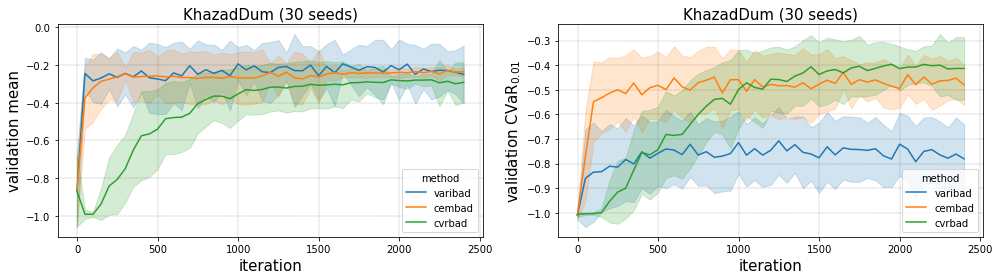

In [7]:
%%time
axs = analysis.show_validation_results_over_seeds(ddm, ddc, ALPHA, TITLE)

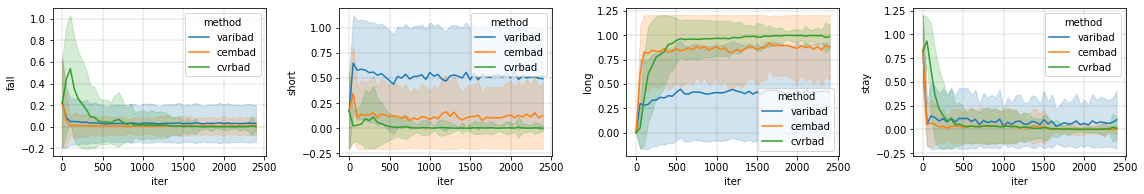

In [8]:
keys = ('fall', 'short', 'long', 'stay')
n = len(keys)
axs = utils.Axes(n, 4, axsize=(4,2.8), fontsize=15)
a = 0

for k in keys:
    dd[k] = [k in p for p in dd['info']]
    sns.lineplot(data=dd, x='iter', y=k, hue='method', ci='sd', ax=axs[a])
    a += 1
plt.tight_layout();

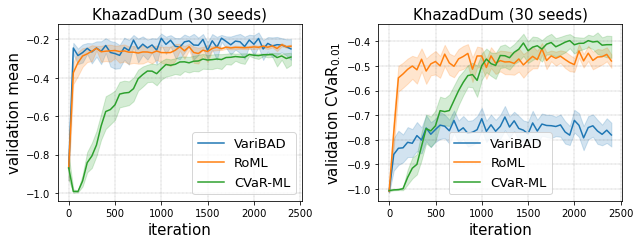

In [9]:
nm_map = dict(varibad='VariBAD', cembad='RoML', cvrbad='CVaR-ML')

dm = ddm[ddm.method.isin(nm_map.keys())].copy()
dc = ddc[ddc.method.isin(nm_map.keys())].copy()
dm['method'] = [nm_map[m] for m in dm.method]
dc['method'] = [nm_map[m] for m in dc.method]

axs = analysis.show_validation_results_over_seeds(dm, dc, ALPHA, TITLE, ci=95, axsize=(4.5,3.5))
axs[0].legend(fontsize=13)
axs[1].legend(fontsize=13)
plt.savefig(f'outputs/kd_valid', bbox_inches='tight', dpi=300);

## Test results

### Final models

In [18]:
model = 'final'
nm_map = dict(varibad='VariBAD', cembad='RoML', cvrbad='CVaR-ML')
save = 'kd_f'
rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
    ENV_NAME, ENV_SHORT, list(nm_map.keys()), SEEDS, ALPHA, model, nm_map=nm_map)

Test tasks: 3008


Average return for tasks with various ranges of noise in KhazadDum: VariBAD has a large drop under high noise, whereas RoML is robust to the task.
Errors correspond to 0.95 confidence intervals over 30 seeds.

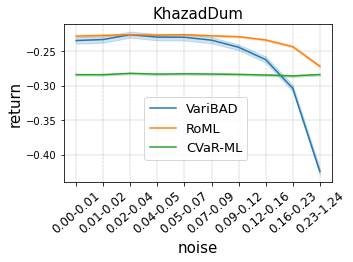

In [19]:
axs = utils.Axes(1,1, fontsize=15)
tit = TITLE  # f'{TITLE}\n(Test tasks, {len(pd.unique(rra.seed))} seeds)'

utils.compare_quantiles(rra, f'task0', 'ret', 'method', mean=None, mean_digits=2,
                        xbins=11, lab_rotation=40, axs=axs, a0=0)
axs.labs(0, TASKS[0], 'return', tit);
plt.legend(loc=(0.3,0.14), fontsize=13);
plt.savefig(f'outputs/{save}_tasks', bbox_inches='tight', dpi=300);

Mean and CVaR returns over 1000 test tasks in KhazadDum.
Errors correspond to 0.95 confidence intervals over 30 seeds.

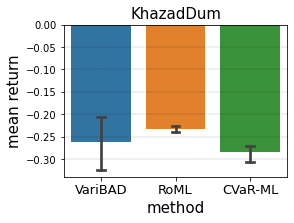

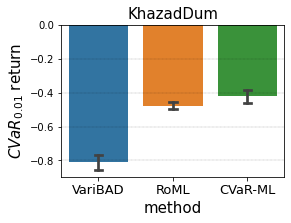

In [20]:
axs = utils.Axes(1,1, (4.0,2.8), fontsize=15)
sns.barplot(data=rrm, x='method', y='ret', ci=95, capsize=0.1, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=13)
axs.labs(0, 'method', 'mean return', TITLE)
plt.savefig(f'outputs/{save}_mean', bbox_inches='tight', dpi=300);

axs = utils.Axes(1,1, (4.0,2.8), fontsize=15)
sns.barplot(data=rrc, x='method', y='ret', ci=95, capsize=0.1, ax=axs[0]);
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=13)
axs.labs(0, 'method', f'$CVaR_{{{ALPHA}}}$ return', TITLE)
plt.savefig(f'outputs/{save}_cvar', bbox_inches='tight', dpi=300);

### Best models

In [15]:
model = lambda nm: 'best_mean' if nm=='varibad' else 'best_cvar'
nm_map = dict(varibad='VariBAD', cembad='RoML', cvrbad='CVaR-ML')
save = 'kd'
rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
    ENV_NAME, ENV_SHORT, list(nm_map.keys()), SEEDS, ALPHA, model, nm_map=nm_map)

Test tasks: 3008


Average return for tasks with various ranges of noise in KhazadDum: VariBAD has a large drop under high noise, whereas RoML is robust to the task.
Errors correspond to 0.95 confidence intervals over 30 seeds.

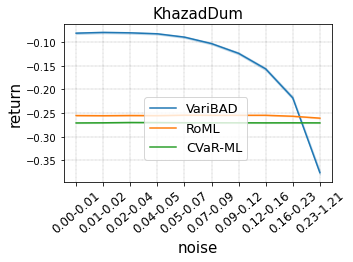

In [16]:
axs = utils.Axes(1,1, fontsize=15)
tit = TITLE  # f'{TITLE}\n(Test tasks, {len(pd.unique(rra.seed))} seeds)'

utils.compare_quantiles(rra, f'task0', 'ret', 'method', mean=None, mean_digits=2,
                        xbins=11, lab_rotation=40, axs=axs, a0=0)
axs.labs(0, TASKS[0], 'return', tit);
plt.legend(loc=(0.3,0.14), fontsize=13);
plt.savefig(f'outputs/{save}_tasks', bbox_inches='tight', dpi=300);

Mean and CVaR returns over 1000 test tasks in KhazadDum.
Errors correspond to 0.95 confidence intervals over 30 seeds.

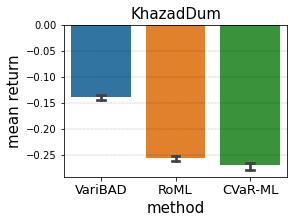

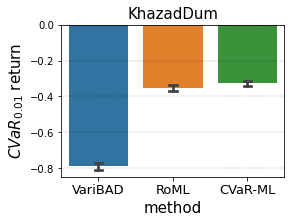

In [17]:
axs = utils.Axes(1,1, (4.0,2.8), fontsize=15)
sns.barplot(data=rrm, x='method', y='ret', ci=95, capsize=0.1, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=13)
axs.labs(0, 'method', 'mean return', TITLE)
plt.savefig(f'outputs/{save}_mean', bbox_inches='tight', dpi=300);

axs = utils.Axes(1,1, (4.0,2.8), fontsize=15)
sns.barplot(data=rrc, x='method', y='ret', ci=95, capsize=0.1, ax=axs[0]);
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=13)
axs.labs(0, 'method', f'$CVaR_{{{ALPHA}}}$ return', TITLE)
plt.savefig(f'outputs/{save}_cvar', bbox_inches='tight', dpi=300);

## Detailed test results

In [10]:
def summary(model, save=None):
    rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
        ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, model)
    
    axs0 = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE)
    if save is not None: plt.savefig(f'outputs/{save}_boxplot', bbox_inches='tight')
    axs1 = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE, barplot=True)
    if save is not None: plt.savefig(f'outputs/{save}_barplot', bbox_inches='tight')
    
    axs2 = analysis.show_test_vs_tasks(rra, rra0, TITLE, TASKS)
    if save is not None: plt.savefig(f'outputs/{save}_tasks', bbox_inches='tight')
    
    axs3 = utils.Axes(3,3)
    sns.countplot(data=rr, x='info', hue='method', ax=axs3[0])
    axs3[0].set_xticklabels(axs3[0].get_xticklabels(), fontsize=12, rotation=20)
    utils.qplot(rra, 'ret', 'task', 'method', ax=axs3[1]);
    utils.qplot(rra, 'ret', 'task', 'method', ax=axs3[2], q=np.arange(0,0.1,0.001))
    plt.tight_layout()
    
    utils.qplot(rr, 'ret', 'task', 'info', utils.Axes(1,1,(6,4))[0]);
    print(rr.groupby('info').apply(lambda d: (len(d), d.ret.mean()) ))
    
    rr['model'] = [f'{m}_{s}' for m,s in zip(rr.method,rr.seed)]
    rr['episode'] = rr.ep.astype(str)
    rr['fall'] = ['fall' in p for p in rr['info']]
    rr['short'] = ['short' in p for p in rr['info']]
    rr['long'] = ['long' in p for p in rr['info']]
    rr['stay'] = ['stay' in p for p in rr['info']]

    axs4 = utils.Axes(4, 4)
    for a, y in enumerate(('long', 'short', 'fall', 'stay')):
        rr['y'] = 100*rr[y]
        sns.lineplot(data=rr, x='ep', y='y', hue='method', ax=axs4[a])
        axs4.labs(a, 'episode', f'{y} [%]', f'KhazadDum ({len(SEEDS)} seeds)')
    plt.tight_layout()
    
    for y in ('long', 'short', 'fall'):
        axs = utils.compare_quantiles(rr[rr.seed.isin(SEEDS[:4])], x='task0', y=y, hue='episode', fac='method', xbins=6, mean_digits=2, axs_args=dict(W=4,axsize=(5,3.5)))
        for a in range(len(axs)):
            axs[a].set_ylim((-0.02,0.2 if y=='fall' else 1.02))

    return rr

Test tasks: 3008
Test returns vs. task - over all seeds aggregated:
info
long              (21620, -0.648882601471492)
long_done        (801771, -0.262254996415261)
long_fall           (13, -0.9999696062161372)
short             (6948, -0.7291445369195787)
short_done    (199967, 0.0025496580109774522)
short_fall       (11715, -1.0211274560577484)
stay             (39960, -0.9989235590020935)
stay_fall          (886, -0.9997644764171497)
dtype: object
CPU times: user 17min 37s, sys: 3min 10s, total: 20min 47s
Wall time: 11min 9s


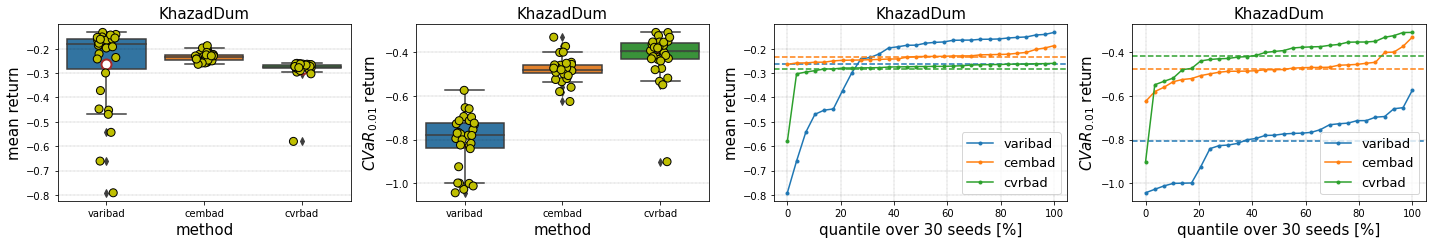

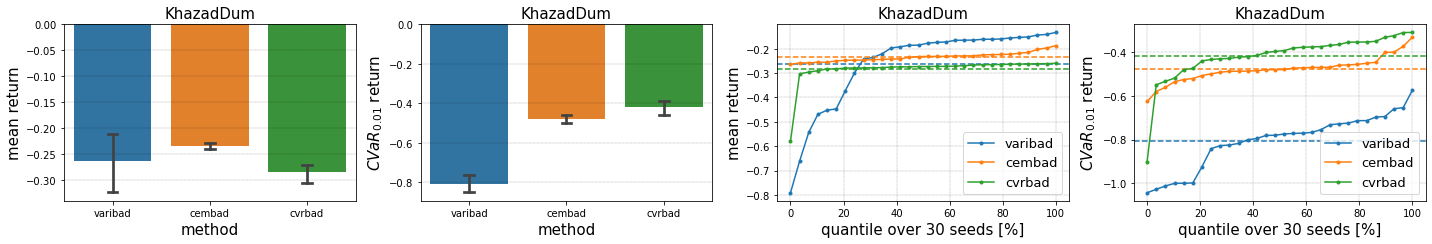

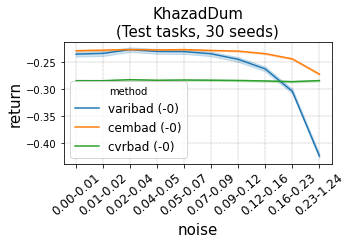

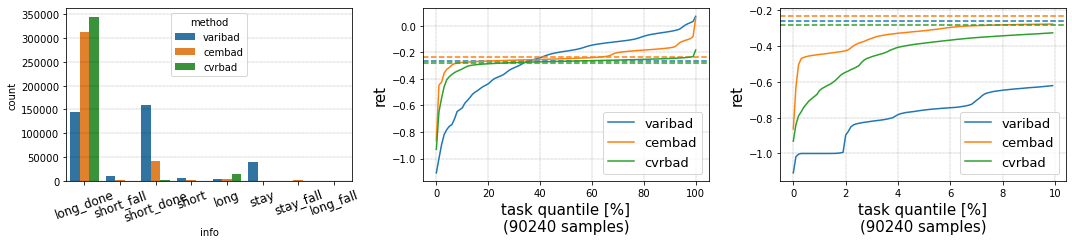

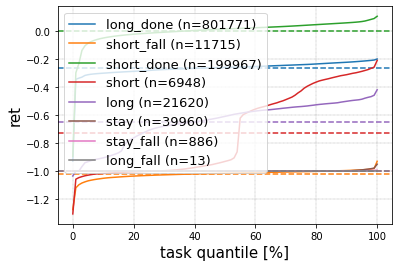

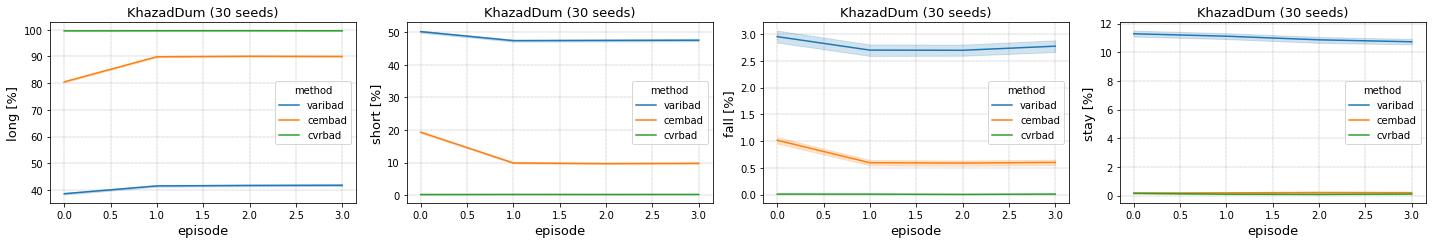

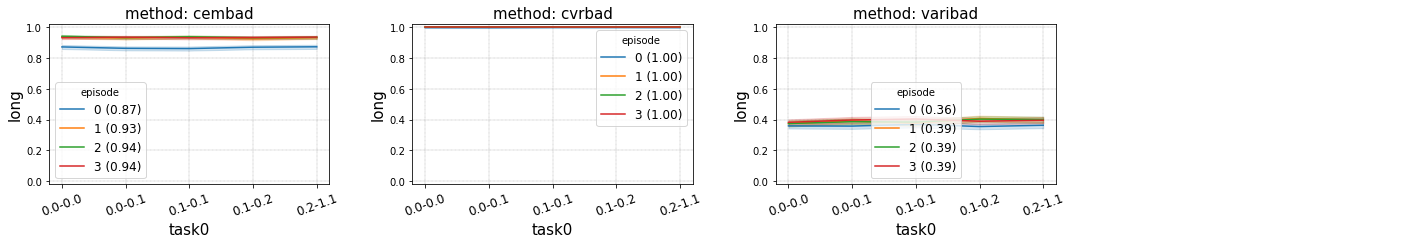

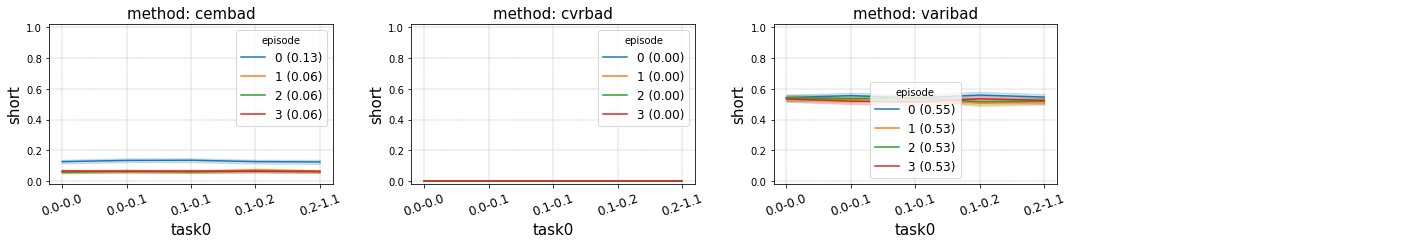

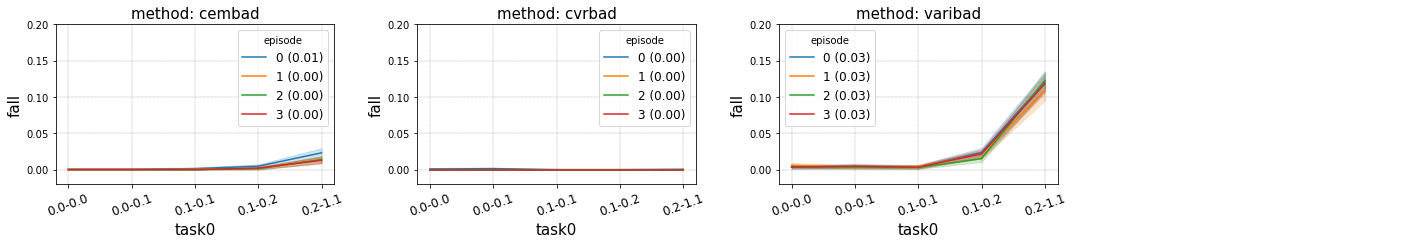

In [11]:
%%time
rr = summary('final')

Test tasks: 3008
Test returns vs. task - over all seeds aggregated:
info
long            (12727, -0.5949509202628459)
long_done     (915345, -0.26569297554508003)
long_fall           (6, -0.9468202193578085)
short            (2583, -0.4642223926348323)
short_done     (83507, 0.006545299071823631)
short_fall       (4428, -1.0209430414163647)
stay            (64166, -0.9994178158559247)
stay_fall         (118, -0.9999081947035708)
dtype: object
CPU times: user 17min 42s, sys: 3min 17s, total: 21min
Wall time: 11min 15s


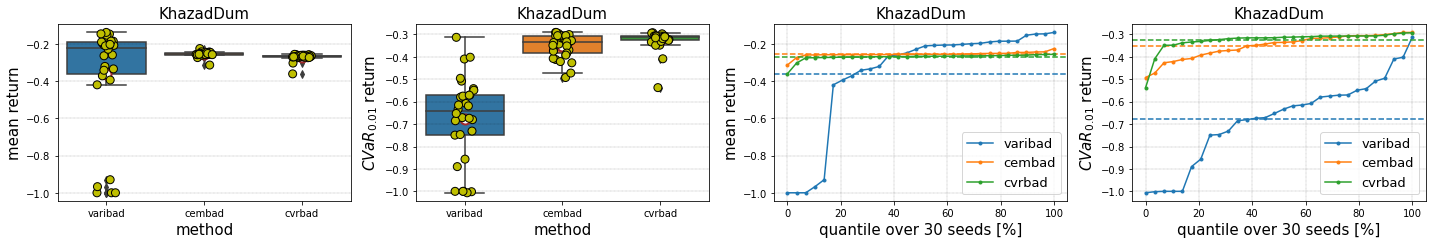

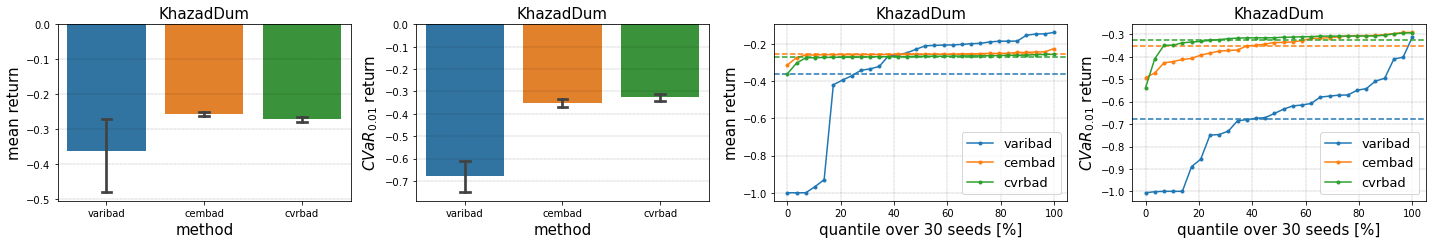

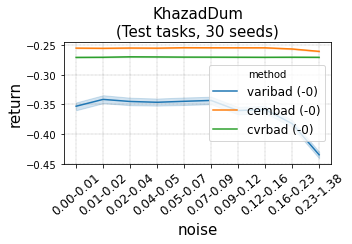

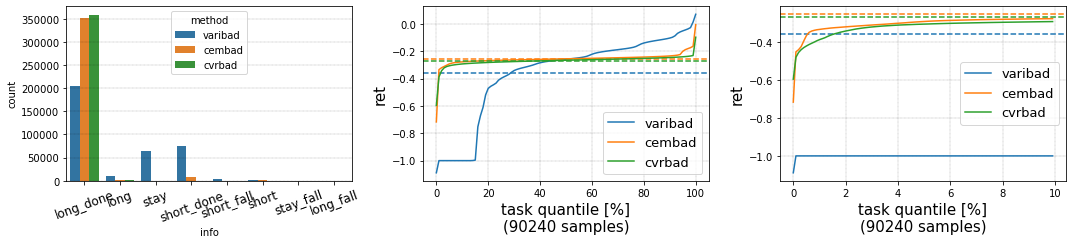

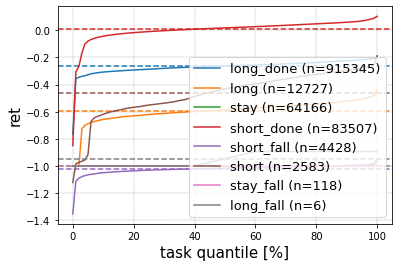

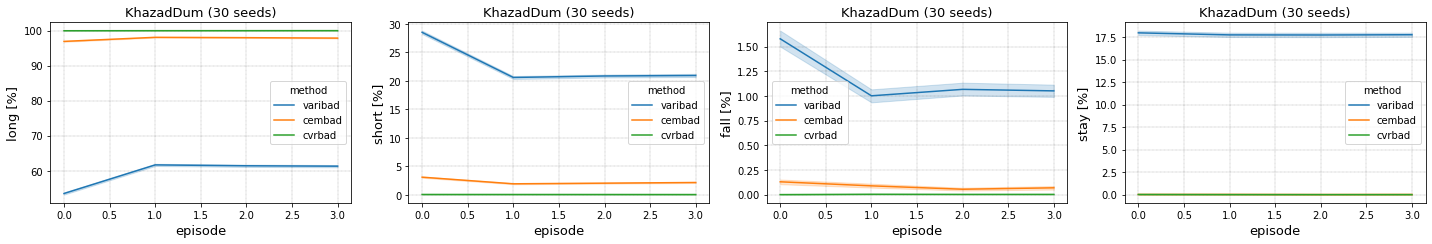

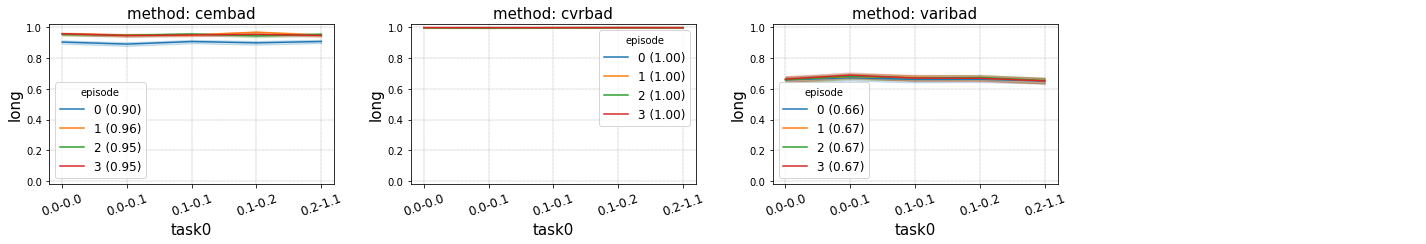

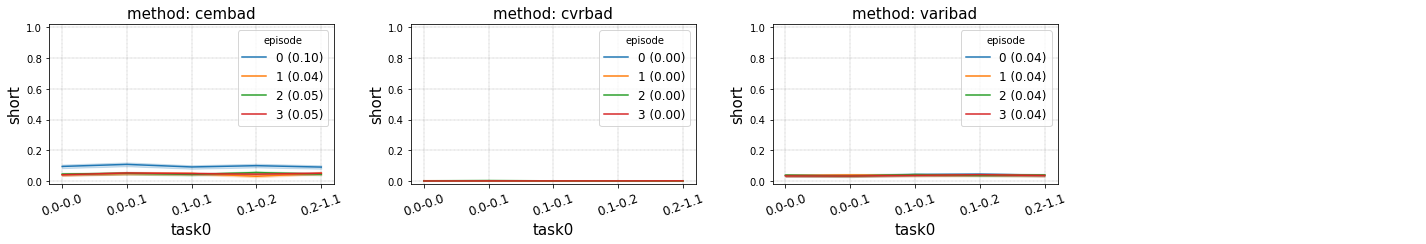

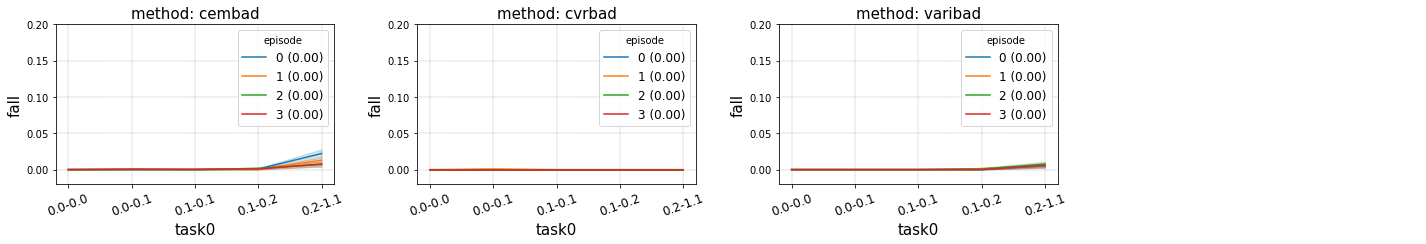

In [12]:
%%time
rr = summary('best_cvar')

Test tasks: 3008
Test returns vs. task - over all seeds aggregated:
info
long             (3450, -0.5870821170012156)
long_done     (822375, -0.26346232046215234)
long_fall           (6, -0.9468202193578085)
short            (3296, -0.5994704689387486)
short_done    (233706, 0.004068994625507533)
short_fall       (17373, -1.017108867656709)
stay             (2067, -0.9996594429362149)
stay_fall         (607, -0.9997591937000708)
dtype: object
CPU times: user 17min 3s, sys: 3min 9s, total: 20min 13s
Wall time: 10min 56s


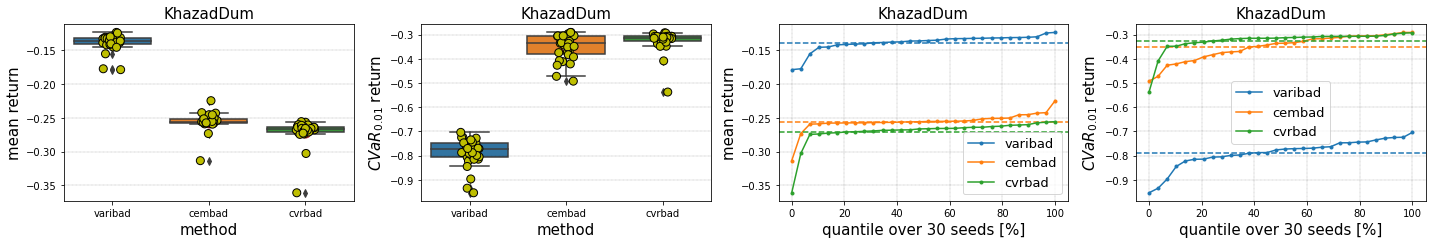

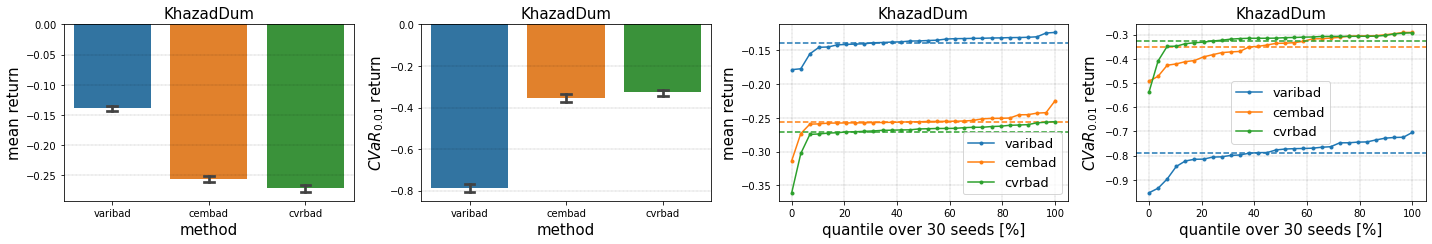

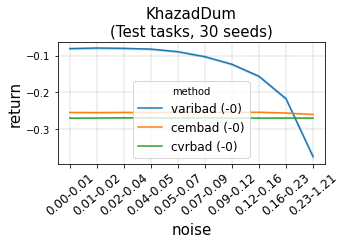

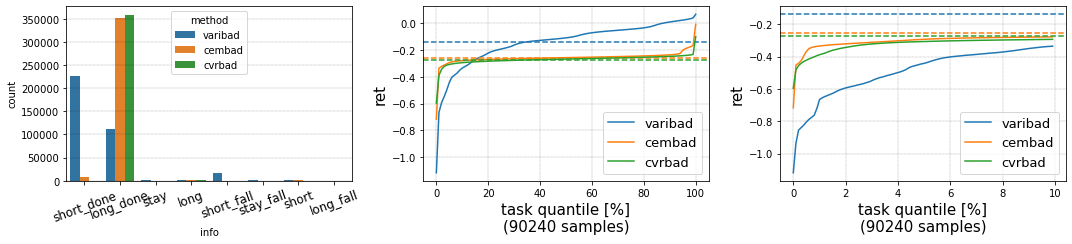

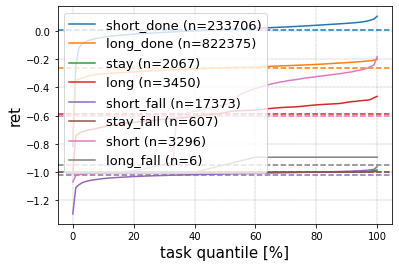

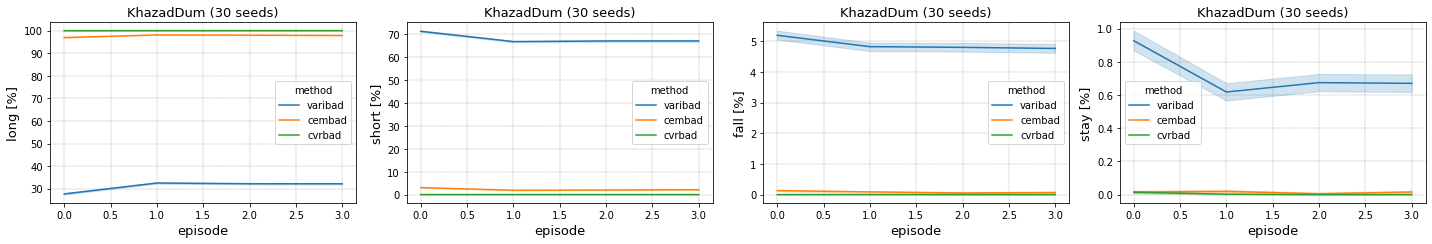

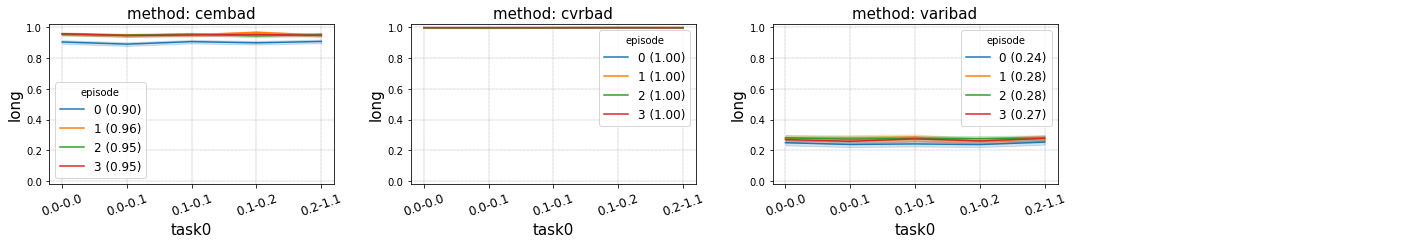

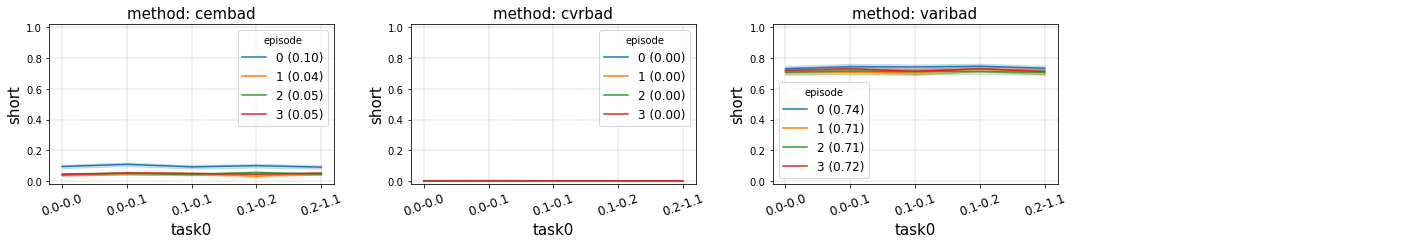

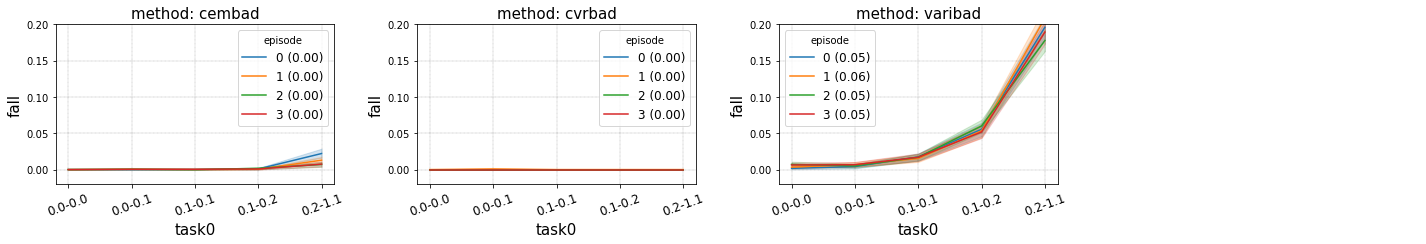

In [13]:
%%time
rr = summary(lambda nm: 'best_mean' if nm=='varibad' else 'best_cvar')

In [14]:
# sns.countplot(data=rr[rr.method=='cembad'], x='info', hue='seed', ax=utils.Axes(1,1,(15,7))[0]);